# Regression

Regressoren dienen dazu, numerische Werte einzuschätzen. Hierzu gibt es im scikit-learn Package für Python mehrere Algorithmen. Wir schauen uns hier ein paar der gängigsten an.

## Libraries importieren

In [ ]:
# Pyplot importieren
import matplotlib.pyplot as plt

# Seaborn importieren
import seaborn as sns

# sklearn libraries importieren
from sklearn import linear_model, tree

# Numpy importieren
import numpy as np

# Variablen für plots
plot_figsize = (10,5)
plot_xlim = [-15, 115]
plot_ylim = [-20, 50]

## Datenset

Die Grundlage für unser Datenset ist eine Funktion (unten in Rot). Von dieser Funktion werden Punkte gewählt. In der echten Welt haben wir jedoch selten so saubere Werte, daher addieren wir noch einen zufälligen Fehlerwert hinzu. Das resultierende Datenset sind die blauen Punkte.

In dem Bereich 45-55 werden keine Daten berechnet, sondern diese Daten sollen vom Modell eingeschätzt werden. Die genauen x-Werte, an welchen die Schätzung passieren soll, ist im unten stehenden Diagramm in Orange eingezeichnet.

Hier kann `num_points` angepasst werden. Für kleine Werte sinkt generell die Präzision, denn der Fehlerwert nimmt überhand.

In [ ]:
# Datenset definieren
num_points = 100

# Zufällige Trainingspunkte
rng = np.random.default_rng()
x_train = np.sort(100 * rng.random(num_points), axis=0)

# Testpunkte in fixem Abstand
x_test = np.arange(start=0, stop=100, step=0.1)

# Modellfunktion berechnen
y_model_train = 0.5*x_train - 10
y_model_test = 0.5*x_test - 10

# Fehlerwerte addieren
y_train = y_model_train + np.random.normal(0, 3, size=(y_model_train.shape[0],))

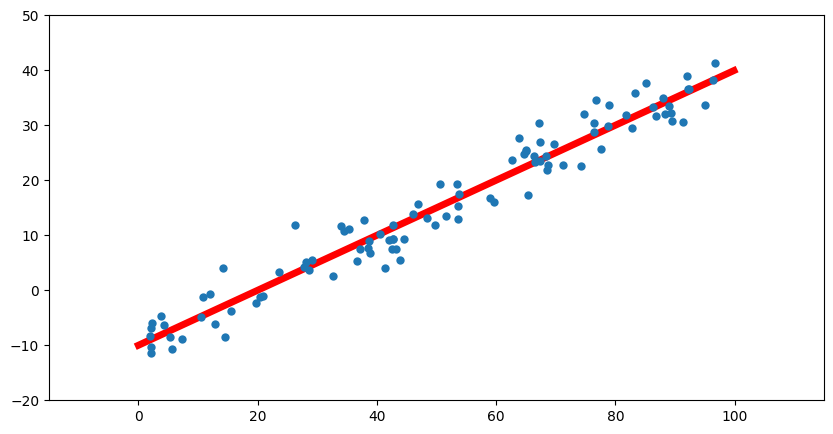

In [ ]:
# Ausgabe Datenset
plt.figure(figsize=plot_figsize)

# Modell-Kurve
plt.plot(x_test, y_model_test, 'r', linewidth=5, zorder=1)

# Trainingsdaten
plt.scatter(
    x_train,
    y_train,
    zorder=3,
    linewidth=0)

plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.show()

## Lineare Regression

### Prinzip

Das Prinzip der linearen Regression ist es, eine lineare Funktion durch die gegebenen Punkte zu ziehen. Das Ziel der Funktion ist es, im Durchschnitt über alle Punkte den vertikalen Abstand von Punkt zu Funktion zu minimieren.

### Modell erstellen, trainieren und Daten schätzen

In [ ]:
# Modell erstellen
reg_lin = linear_model.LinearRegression()

# Modell auf die gegebenen Daten trainieren
reg_lin.fit(x_train.reshape(-1, 1), y_train) # Achtung: `.reshape(-1, 1)` ist nur nötig, weil wir kein Pandas verwenden.

# Modell auf Punkte anwenden
y_predict = reg_lin.predict(x_test.reshape(-1, 1))

## Decision Tree

### Prinzip

Das Prinzip des Decision Trees der Regression ist dasselbe wie bei der Klassifikation, jedoch wird anstatt einer Klasse ein bestimmter Wert ausgewählt. So kann ein Knoten sich für den Durchschnitt aller Punkte, welche in diesem Knoten landen, entscheiden.

### Modell erstellen, trainieren und Daten schätzen

In [ ]:
# Decision Tree Regressor erstellen
# Die max_depth kann angepasst werden. Ganzzahl oder `max_depth=None`.
reg_dt = tree.DecisionTreeRegressor(max_depth=2)

# Modell auf die gegebenen Daten trainieren
x_train_dt = x_train[:, np.newaxis] # Achtung: Diese Zeile ist nur nötig, weil wir hier kein Pandas verwenden.
reg_dt.fit(x_train_dt, y_train)

# Modell auf Punkte anwenden
x_test_dt = x_test[:, np.newaxis]
y_predict_tree = reg_dt.predict(x_test_dt)

# plt.figure(figsize=(30,30))
# tree.plot_tree(reg_dt, max_depth=5, fontsize=10)

## Resultate darstellen

Vergleich von Vorhergesagten Punkte zu tatsächlichen Punkten:

<ipython-input-25-3f448b6e3a10>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_test, y_predict_tree, 'k', linewidth=3, zorder=2, color='orange')


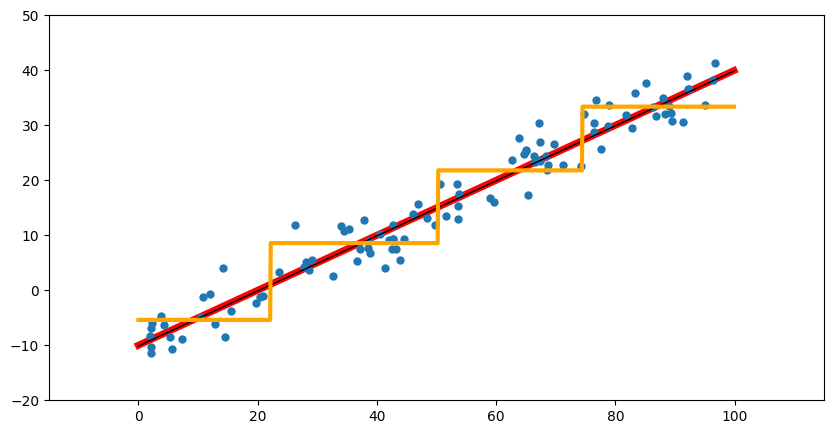

In [ ]:
plt.figure(figsize=plot_figsize)

# Modell-Kurve
# plt.plot(x_test, y_model_test, 'r', linewidth=5, zorder=1)

# Trainingsdaten
plt.scatter(
    x_train,
    y_train,
    zorder=2,
    linewidth=0)

# Vorhersagen Testdaten
plt.plot(x_test, y_predict, 'k', linewidth=1, zorder=2)
plt.plot(x_test, y_predict_tree, 'k', linewidth=3, zorder=2, color='orange')


plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.show()